## Task 1: Load the Data into ChatGPT

In [19]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make plots appear in the notebook
%matplotlib inline

In [20]:
import pandas as pd

# Cell: Load the Titanic dataset
# The original file path was not found. Using a public URL for the Titanic dataset.
file_path = "/content/titanic (1) (1) (1).csv"
titanic = pd.read_csv(file_path)

# Display first 5 rows to confirm successful loading
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##Task 2: Choose 5 important columns & perform Basic Statistics (Mean, Median, Mode, Std Dev, Min, Max)

In [21]:
file_path = "/content/titanic (1) (1) (1).csv"     # change only if filename is different
titanic = pd.read_csv(file_path)

# Select only the 5 required columns
titanic_5 = titanic[['survived', 'pclass', 'sex', 'age', 'fare']]
titanic_5.head()

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [22]:
# Convert 'sex' column to numeric for statistical calculations
titanic_5['sex_numeric'] = titanic_5['sex'].map({'male': 1, 'female': 0})

/tmp/ipython-input-4037880586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_5['sex_numeric'] = titanic_5['sex'].map({'male': 1, 'female': 0})


In [23]:
# Compute descriptive statistics
basic_stats = pd.DataFrame({
    'Mean': titanic_5[['survived', 'pclass', 'sex_numeric', 'age', 'fare']].mean(),
    'Median': titanic_5[['survived', 'pclass', 'sex_numeric', 'age', 'fare']].median(),
    'Mode': titanic_5[['survived', 'pclass', 'sex_numeric', 'age', 'fare']].mode().iloc[0],
    'Std_Dev': titanic_5[['survived', 'pclass', 'sex_numeric', 'age', 'fare']].std(),
    'Min': titanic_5[['survived', 'pclass', 'sex_numeric', 'age', 'fare']].min(),
    'Max': titanic_5[['survived', 'pclass', 'sex_numeric', 'age', 'fare']].max()
})

basic_stats

,Mean,Median,Mode,Std_Dev,Min,Max
survived,0.383838,0.0000,0.00,0.486592,0.00,1.0000
pclass,2.308642,3.0000,3.00,0.836071,1.00,3.0000
sex_numeric,0.647587,1.0000,1.00,0.477990,0.00,1.0000
age,29.699118,28.0000,24.00,14.526497,0.42,80.0000
fare,32.204208,14.4542,8.05,49.693429,0.00,512.3292


## Task 3: Check for missing values

In [24]:
# Check missing values count and percentage for each of the 5 selected columns
missing_report = pd.DataFrame({
    'Missing_Count': titanic_5[['survived', 'pclass', 'sex', 'age', 'fare']].isnull().sum(),
    'Missing_Percentage': (titanic_5[['survived', 'pclass', 'sex', 'age', 'fare']].isnull().mean() * 100).round(2)
})

missing_report


,Missing_Count,Missing_Percentage
survived,0,0.00
pclass,0,0.00
sex,0,0.00
age,177,19.87
fare,0,0.00


## Task 4: Check for Outliers

In [25]:
# Outlier detection using IQR method (for numeric columns only)

numeric_cols = ['survived', 'pclass', 'age', 'fare']
outliers = {}

for col in numeric_cols:
    Q1 = titanic_5[col].quantile(0.25)       # 25th percentile
    Q3 = titanic_5[col].quantile(0.75)       # 75th percentile
    IQR = Q3 - Q1                            # IQR = Q3 - Q1

    # Outlier boundaries based on math formula:
    # Lower Bound = Q1 - 1.5 × IQR
    # Upper Bound = Q3 + 1.5 × IQR
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count values outside the boundaries
    count = titanic_5[(titanic_5[col] < lower) | (titanic_5[col] > upper)][col].count()

    outliers[col] = {'Lower Bound': lower, 'Upper Bound': upper, 'Outlier Count': count}

pd.DataFrame(outliers).T

,Lower Bound,Upper Bound,Outlier Count
survived,-1.5000,2.5000,0.0
pclass,0.5000,4.5000,0.0
age,-6.6875,64.8125,11.0
fare,-26.7240,65.6344,116.0


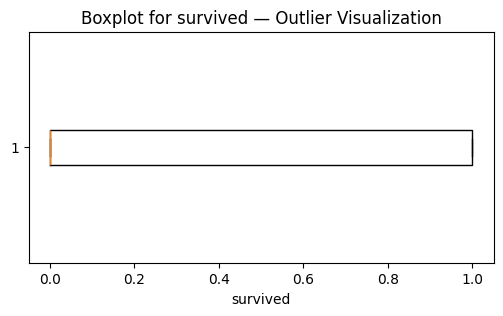

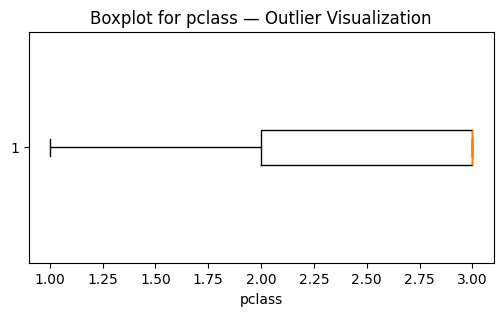

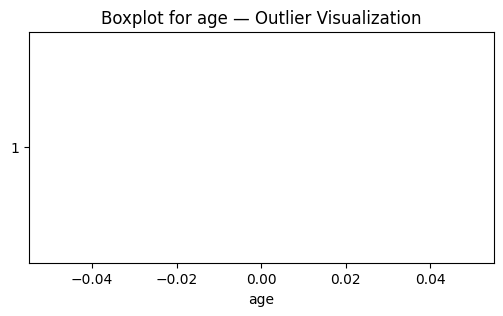

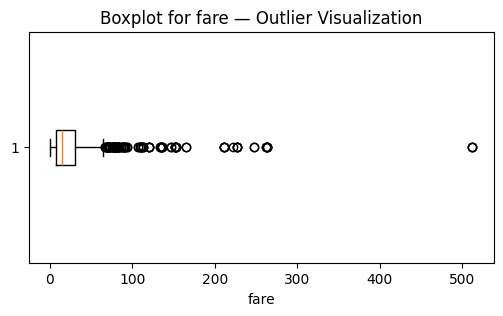

In [26]:
import matplotlib.pyplot as plt

numeric_cols = ['survived', 'pclass', 'age', 'fare']

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(titanic_5[col], vert=False)
    plt.title(f'Boxplot for {col} — Outlier Visualization')
    plt.xlabel(col)
    plt.show()


## Task 5: Univariate Analysis (Visualize the distribution of a column)

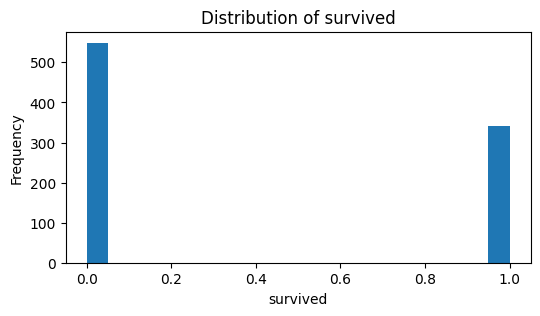

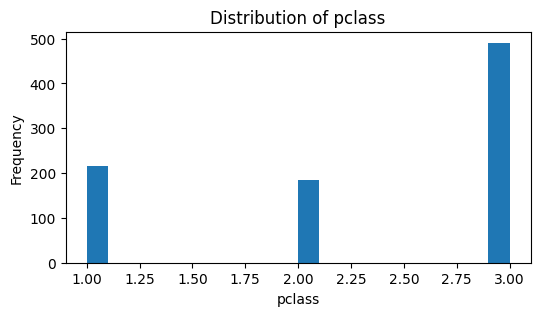

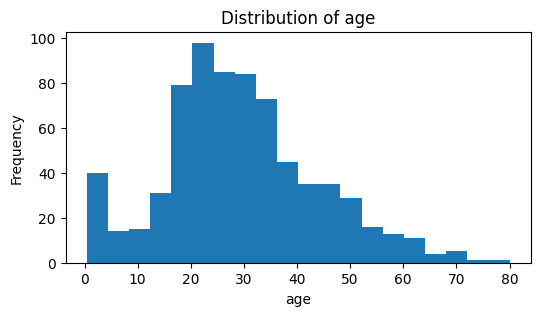

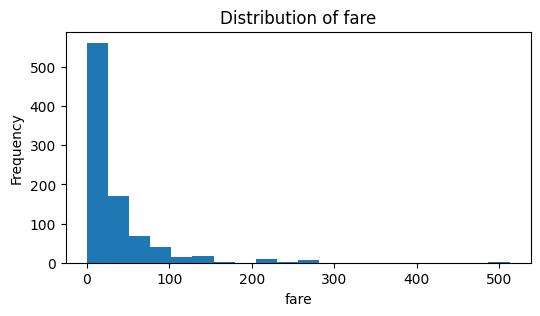

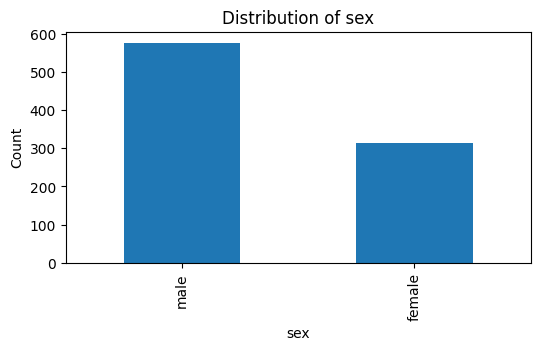

In [27]:
import matplotlib.pyplot as plt

# List of numeric and categorical columns
numeric_cols = ['survived', 'pclass', 'age', 'fare']
categorical_col = 'sex'

# Histogram for numeric variables
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.hist(titanic_5[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Countplot for categorical variable
plt.figure(figsize=(6,3))
titanic_5[categorical_col].value_counts().plot(kind='bar')
plt.title(f'Distribution of {categorical_col}')
plt.xlabel(categorical_col)
plt.ylabel('Count')
plt.show()

## Task 6: Bi-  variate Analysis (Relationship between main column (Survived) and other 4 important columns one - by - one)

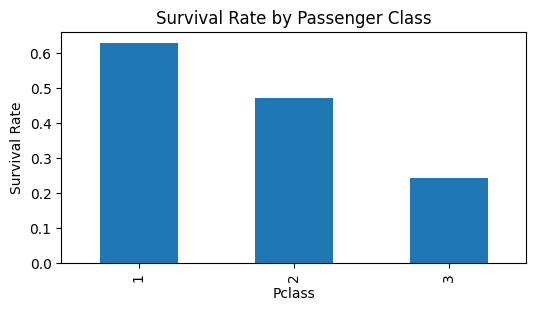

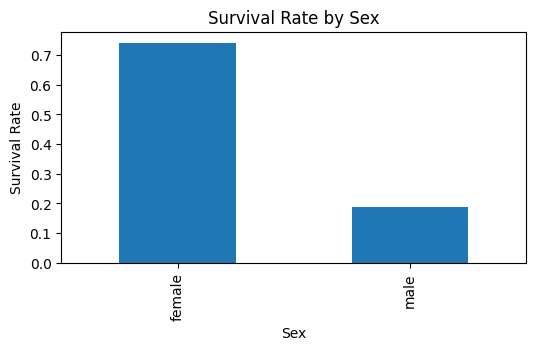

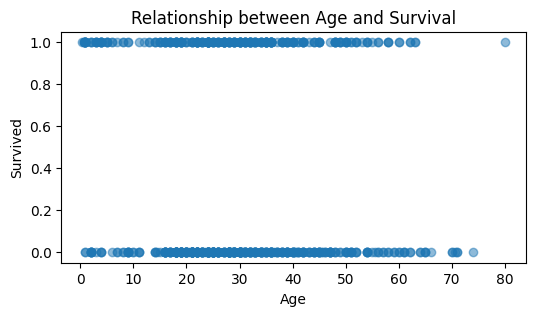

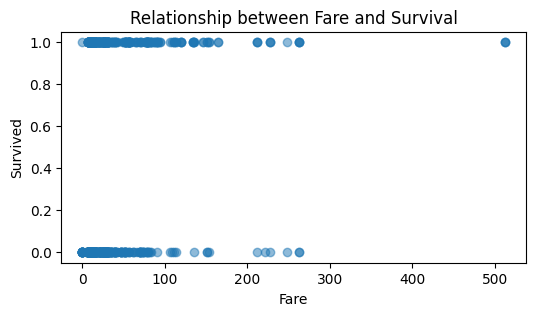

In [28]:
import matplotlib.pyplot as plt

# 1) Survived vs Pclass
plt.figure(figsize=(6,3))
titanic_5.groupby('pclass')['survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.show()

# 2) Survived vs Sex
plt.figure(figsize=(6,3))
titanic_5.groupby('sex')['survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()

# 3) Survived vs Age
plt.figure(figsize=(6,3))
plt.scatter(titanic_5['age'], titanic_5['survived'], alpha=0.5)
plt.title("Relationship between Age and Survival")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

# 4) Survived vs Fare
plt.figure(figsize=(6,3))
plt.scatter(titanic_5['fare'], titanic_5['survived'], alpha=0.5)
plt.title("Relationship between Fare and Survival")
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.show()

In [29]:
corr_matrix = titanic_5[['survived', 'pclass', 'sex_numeric', 'age', 'fare']].corr()
corr_matrix


,survived,pclass,sex_numeric,age,fare
survived,1.000000,-0.338481,-0.543351,-0.077221,0.257307
pclass,-0.338481,1.000000,0.131900,-0.369226,-0.549500
sex_numeric,-0.543351,0.131900,1.000000,0.093254,-0.182333
age,-0.077221,-0.369226,0.093254,1.000000,0.096067
fare,0.257307,-0.549500,-0.182333,0.096067,1.000000


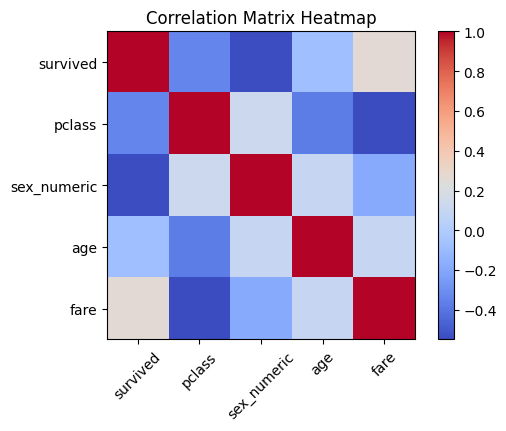

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix Heatmap")
plt.show()